<a href="https://colab.research.google.com/github/renewable-energy-experiments/carbonfoorprint/blob/master/power_generation_caiso_extrapolated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> US electricity generation by energy source ( price , co2 emission by grids)<center><h1> 
  High granularity Power generation CA ISO ( California) 

# Table of Contents
* [1. DataSet Description](#section-one)
* [2. Import and Preprocessing](#section-two)
* [3. Filler and Filter](#section-three)
* [4. Daily Grpahs](#section-four)
* [5. Carbon Emission vs Fuel](#section-five)
* [6. Price vs Fuel](#section-six)

<a id="section-one"></a>
# 1. DataSet Description

Dataset is weekly reports from EDA  for CA ISO

<a id="section-two"></a>
# 2. Import & Preprocessing

Let's have a first look at the data. For the sake of simplicity we are only looking at data of plant 1 (power generation and weather). Data of power plant 2 can then be explored in a similar manner.

In [ ]:
import os
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates 
xformatter = mdates.DateFormatter('%H:%M') # for time axis plots

# import plotly.offline as py
# py.init_notebook_mode(connected=True)

import sklearn
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import all available data 
# df = pd.read_csv("../input/us-electricity-by-energy-source-in-spring/930-data-export.csv")

df = pd.read_csv("/content/CAISO-supply-20200706.csv")
df2 = pd.read_csv("/content/CAISO-supply-20200707.csv")
df3 = pd.read_csv("/content/CAISO-supply-20200708.csv")
df4 = pd.read_csv("/content/CAISO-supply-20200709.csv")
df5 = pd.read_csv("/content/CAISO-supply-20200710.csv")
df6 = pd.read_csv("/content/CAISO-supply-20200711.csv")

df =  df.transpose()
df2 =  df2.transpose()
df3 =  df3.transpose()
df4 =  df4.transpose()
df5 =  df5.transpose()
df6 =  df6.transpose()

In [ ]:
df.rename(columns=df.iloc[0], inplace = True)
df2.rename(columns=df2.iloc[0], inplace = True)
df3.rename(columns=df3.iloc[0], inplace = True)
df4.rename(columns=df4.iloc[0], inplace = True)
df5.rename(columns=df5.iloc[0], inplace = True)
df6.rename(columns=df6.iloc[0], inplace = True)
df2.head()

,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other
Supply 07/07/2020,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other
0:00,5977,7918,1946,8518,-4,2273,12,0
0:05,5912,7628,1995,8673,-6,2274,13,0
0:10,5885,7525,1987,8651,-8,2273,12,0
0:15,5854,7453,1958,8726,-77,2273,10,0


In [ ]:
def df_manipulation(dfs):
    dfs['Timestamp'] = dfs.index
    date =  dfs.iloc[0].Timestamp.replace('Supply ','')
    dfs['DATE'] = date
    dfs = dfs[1:len(dfs)-1]
    dfs['DATE'] =  pd.to_datetime(dfs['DATE'],format = '%d/%m/%Y').dt.date
    dfs['TIME'] = pd.to_datetime(dfs['Timestamp'],format = '%H:%M').dt.time
    dfs['HOURS'] = pd.to_datetime(dfs['TIME'],format='%H:%M:%S').dt.hour
    dfs['MINUTES'] = pd.to_datetime(dfs['TIME'],format='%H:%M:%S').dt.minute
    dfs['MINUTES_PASS'] = dfs['MINUTES'] + dfs['HOURS']*60
    dfs['Timestamp'] = pd.to_datetime(dfs['DATE'].apply(str) +' '+ dfs['TIME'].apply(str), format = '%Y-%m-%d %H:%M')
    return dfs

In [ ]:
dff = df_manipulation(df)
dff2 = df_manipulation(df2)
dff3 = df_manipulation(df3)
dff4 = df_manipulation(df4)
dff5 = df_manipulation(df5)
dff6 = df_manipulation(df6)

dff.head()

,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Timestamp,DATE,TIME,HOURS,MINUTES,MINUTES_PASS
0:00,6487,6999,1859,7899,-1,2266,9,0,2020-06-07 00:00:00,2020-06-07,00:00:00,0,0,0
0:05,6482,6674,1883,8142,12,2266,11,0,2020-06-07 00:05:00,2020-06-07,00:05:00,0,5,5
0:10,6487,6501,1844,8197,-6,2266,10,0,2020-06-07 00:10:00,2020-06-07,00:10:00,0,10,10
0:15,6466,6588,1852,8037,-31,2266,10,0,2020-06-07 00:15:00,2020-06-07,00:15:00,0,15,15
0:20,6422,6509,1860,8012,-31,2266,10,0,2020-06-07 00:20:00,2020-06-07,00:20:00,0,20,20


In [ ]:
dff2.head()

,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Timestamp,DATE,TIME,HOURS,MINUTES,MINUTES_PASS
0:00,5977,7918,1946,8518,-4,2273,12,0,2020-07-07 00:00:00,2020-07-07,00:00:00,0,0,0
0:05,5912,7628,1995,8673,-6,2274,13,0,2020-07-07 00:05:00,2020-07-07,00:05:00,0,5,5
0:10,5885,7525,1987,8651,-8,2273,12,0,2020-07-07 00:10:00,2020-07-07,00:10:00,0,10,10
0:15,5854,7453,1958,8726,-77,2273,10,0,2020-07-07 00:15:00,2020-07-07,00:15:00,0,15,15
0:20,5838,6999,1900,9103,-48,2272,11,0,2020-07-07 00:20:00,2020-07-07,00:20:00,0,20,20


In [ ]:
dff3.head()

,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Timestamp,DATE,TIME,HOURS,MINUTES,MINUTES_PASS
0:00,5452,8185,2027,9029,-6,2275,12,0,2020-08-07 00:00:00,2020-08-07,00:00:00,0,0,0
0:05,5370,8076,2089,9036,9,2275,12,0,2020-08-07 00:05:00,2020-08-07,00:05:00,0,5,5
0:10,5315,7884,2112,9032,9,2276,12,0,2020-08-07 00:10:00,2020-08-07,00:10:00,0,10,10
0:15,5312,7630,2072,9178,-8,2274,11,0,2020-08-07 00:15:00,2020-08-07,00:15:00,0,15,15
0:20,5320,7412,2101,9268,-21,2274,10,0,2020-08-07 00:20:00,2020-08-07,00:20:00,0,20,20


In [ ]:
dff4.head()

,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Timestamp,DATE,TIME,HOURS,MINUTES,MINUTES_PASS
0:00,6086,8045,1804,8583,-67,2272,13,0,2020-09-07 00:00:00,2020-09-07,00:00:00,0,0,0
0:05,6078,7622,1775,8889,11,2272,12,0,2020-09-07 00:05:00,2020-09-07,00:05:00,0,5,5
0:10,6115,7684,2019,8503,-34,2272,11,0,2020-09-07 00:10:00,2020-09-07,00:10:00,0,10,10
0:15,6151,7472,1908,8527,-83,2273,11,0,2020-09-07 00:15:00,2020-09-07,00:15:00,0,15,15
0:20,6152,7190,1837,8833,-70,2272,12,0,2020-09-07 00:20:00,2020-09-07,00:20:00,0,20,20


In [ ]:
# df['Timestamp'] = df.index
# df['DATE'] = df.iloc[0].Timestamp.replace('Supply ','')

In [ ]:
# Remove row 0 
# df.drop([1], inplace = True)
# df.columns = df.iloc[0]

# df = df[1:len(df)-1]

In [ ]:
# df['DATE'] =  pd.to_datetime(df['DATE'],format = '%m/%d/%Y', errors='coerce').dt.date
# df['TIME'] = pd.to_datetime(df['Timestamp'],format = '%H:%M', errors='coerce').dt.time

In [ ]:
# df.describe()
# df.info()
# print(df.dtypes)

In [ ]:
# # add hours and minutes for ml models
# df['HOURS'] = pd.to_datetime(df['TIME'],format='%H:%M:%S').dt.hour
# df['MINUTES'] = pd.to_datetime(df['TIME'],format='%H:%M:%S').dt.minute
# df['MINUTES_PASS'] = df['MINUTES'] + df['HOURS']*60

In [ ]:
# append all 

df = dff.append(dff)
df = df.append(dff2)
df = df.append(dff3)
df = df.append(dff4)
df = df.append(dff5)
df = df.append(dff6)
len(df) 

2016

In [ ]:
# Region = df['Region Code'].head(1).item()
# Region

Region="CA ISO"

<a id="section-three"></a>
## 3. Filter and filler 

In [ ]:
print(df.dtypes)

Renewables              object
Natural gas             object
Large hydro             object
Imports                 object
Batteries               object
Nuclear                 object
Coal                    object
Other                   object
Timestamp       datetime64[ns]
DATE                    object
TIME                    object
HOURS                    int64
MINUTES                  int64
MINUTES_PASS             int64
dtype: object


In [ ]:
# df['Hydro'] = df['Hydro'] + df ['Large hydro']
# df['NaturalGas'] = df['NaturalGas'] + df ['Natural gas']
df = df.rename(columns={"Natural gas": "NaturalGas",
                        "Renewables" : "Solar",
                        "Large hydro": "Hydro"
                       })
df.head()

,Solar,NaturalGas,Hydro,Imports,Batteries,Nuclear,Coal,Other,Timestamp,DATE,TIME,HOURS,MINUTES,MINUTES_PASS
0:00,6487,6999,1859,7899,-1,2266,9,0,2020-06-07 00:00:00,2020-06-07,00:00:00,0,0,0
0:05,6482,6674,1883,8142,12,2266,11,0,2020-06-07 00:05:00,2020-06-07,00:05:00,0,5,5
0:10,6487,6501,1844,8197,-6,2266,10,0,2020-06-07 00:10:00,2020-06-07,00:10:00,0,10,10
0:15,6466,6588,1852,8037,-31,2266,10,0,2020-06-07 00:15:00,2020-06-07,00:15:00,0,15,15
0:20,6422,6509,1860,8012,-31,2266,10,0,2020-06-07 00:20:00,2020-06-07,00:20:00,0,20,20


## Fill up missing columns as 0 

In [ ]:
column_list = ("Wind","Solar","Hydro","Other", 
               "Oil", "NaturalGas","Coal","Nuclear")

for col in column_list:
    if col not in df.columns:
        df[col] = 0

df.head()

,Solar,NaturalGas,Hydro,Imports,Batteries,Nuclear,Coal,Other,Timestamp,DATE,TIME,HOURS,MINUTES,MINUTES_PASS,Wind,Oil
0:00,6487,6999,1859,7899,-1,2266,9,0,2020-06-07 00:00:00,2020-06-07,00:00:00,0,0,0,0,0
0:05,6482,6674,1883,8142,12,2266,11,0,2020-06-07 00:05:00,2020-06-07,00:05:00,0,5,5,0,0
0:10,6487,6501,1844,8197,-6,2266,10,0,2020-06-07 00:10:00,2020-06-07,00:10:00,0,10,10,0,0
0:15,6466,6588,1852,8037,-31,2266,10,0,2020-06-07 00:15:00,2020-06-07,00:15:00,0,15,15,0,0
0:20,6422,6509,1860,8012,-31,2266,10,0,2020-06-07 00:20:00,2020-06-07,00:20:00,0,20,20,0,0


In [ ]:
df['Nuclear'] = pd.to_numeric(df['Nuclear'], errors='coerce').fillna(0)
df['Hydro'] = pd.to_numeric(df['Hydro'], errors='coerce').fillna(0)
df['NaturalGas'] = pd.to_numeric(df['NaturalGas'], errors='coerce').fillna(0)
df['Coal'] = pd.to_numeric(df['Coal'], errors='coerce').fillna(0)
df['Solar'] = pd.to_numeric(df['Solar'], errors='coerce').fillna(0)
df['Coal'] = pd.to_numeric(df['Coal'], errors='coerce').fillna(0)
df['Oil'] = pd.to_numeric(df['Oil'], errors='coerce').fillna(0)
df['Other'] = pd.to_numeric(df['Other'], errors='coerce').fillna(0)
print(df.dtypes)

Solar                    int64
NaturalGas               int64
Hydro                    int64
Imports                 object
Batteries               object
Nuclear                  int64
Coal                     int64
Other                    int64
Timestamp       datetime64[ns]
DATE                    object
TIME                    object
HOURS                    int64
MINUTES                  int64
MINUTES_PASS             int64
Wind                     int64
Oil                      int64
dtype: object


## Timestamp  different utility Graphs  

In [ ]:
dates = df['DATE'].unique()
dates

array([datetime.date(2020, 6, 7), datetime.date(2020, 7, 7),
       datetime.date(2020, 8, 7), datetime.date(2020, 9, 7),
       datetime.date(2020, 10, 7), datetime.date(2020, 11, 7)],
      dtype=object)

In [ ]:
# remove first day which doesnt have all hours 
# dates= dates[1:]

In [ ]:
# all the hours in day
day1 = df[df['DATE']==dates[0]]
day1['HOURS'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
# df['Other'] = df['Other'].astype(int) + df['Wood'].astype(int) + df['Refuse'].astype(int) + df['LandfillGas'].astype(int)
# df = df.drop(columns=['Wood','Refuse','Renewables','LandfillGas'])
# df.head()

In [ ]:
# Pie chart ( Fuel Mix)
# df_nw.plot.pie(
#     index=["Wind Generation (MWh)","Solar Generation (MWh)","Hydro Generation (MWh)","Other Generation (MWh)", 
#             "Petroleum Generation (MWh)", "Natural gas Generation (MWh)","Coal Generation (MWh)","Nuclear Generation (MWh)"],
#     subplots=True, name='Fuel Distribution in Generation / Fuel Mix')

### Inperpolate values for missing dates

In [ ]:
# index = pd.date_range(datetime.date(2020, 7, 6), periods=1440, freq='T')
# series = pd.Series(range(1440), index=index, name='Timestamp')
# series = pd.to_datetime(series.index,format = '%Y-%d-%m %H:%M:%S')
# # print(series)

# dhours = df[df['DATE']==datetime.date(2020, 7, 6)]
# dunique_minpass = dhours['Timestamp'].unique()
# # dunique_minpass = pd.to_datetime(dunique_minpass ,format = '%Y-%d-%m %H:%M:%S')
# # print(dunique_minpass)

# for m in series: 
#     if m not in dunique_minpass:
#         print("missing tiemstamp ", m)
#         dhours = dhours.append({ 
#             'Timestamp': m,
#             'Renewables': 0
#         }, ignore_index = True) 
#     else :
#         print("Exists tmestamp ", m) 

In [ ]:
df.head()
# len(df)

,Solar,NaturalGas,Hydro,Imports,Batteries,Nuclear,Coal,Other,Timestamp,DATE,TIME,HOURS,MINUTES,MINUTES_PASS,Wind,Oil
0:00,6487,6999,1859,7899,-1,2266,9,0,2020-06-07 00:00:00,2020-06-07,00:00:00,0,0,0,0,0
0:05,6482,6674,1883,8142,12,2266,11,0,2020-06-07 00:05:00,2020-06-07,00:05:00,0,5,5,0,0
0:10,6487,6501,1844,8197,-6,2266,10,0,2020-06-07 00:10:00,2020-06-07,00:10:00,0,10,10,0,0
0:15,6466,6588,1852,8037,-31,2266,10,0,2020-06-07 00:15:00,2020-06-07,00:15:00,0,15,15,0,0
0:20,6422,6509,1860,8012,-31,2266,10,0,2020-06-07 00:20:00,2020-06-07,00:20:00,0,20,20,0,0


In [ ]:
df2 = pd.DataFrame()

for d in dates:
#     print(d)
    dhours = df[df['DATE']==d]
    dunique_minpass = dhours['Timestamp'].unique()
    dunique_minpass = pd.to_datetime(dunique_minpass ,format = '%Y-%m-%d %H:%M')
#     print(dunique_minpass)
#     '2020-07-06 00:00:00' 
    index = pd.date_range(d, periods=1440, freq='T')
    series = pd.Series(range(1440), index=index, name='Timestamp')
    series = pd.to_datetime(series.index,format = '%Y-%m-%d %H:%M')
#     print(series)
#    '2020-06-07 00:00:00'
    for m in series: 
        if m not in dunique_minpass:
#           print("missing tiemstamp " , m)
            dhours = dhours.append({ 
                'Timestamp': m,
                'Batteries': 0
            }, ignore_index = True) 
#         else :
#             print("Exists tmestamp " , m) 
    dhours = dhours.sort_values(by='Timestamp')
    dhours = dhours.interpolate(method ='linear', limit_direction ='forward')

    # adding separate time and date columns
    dhours["DATE"] = pd.to_datetime(dhours["Timestamp"]).dt.date # add new column with date
    dhours["TIME"] = pd.to_datetime(dhours["Timestamp"]).dt.time # add new column with time

    # add hours and minutes for ml models
    dhours['HOURS'] = pd.to_datetime(dhours['TIME'],format='%H:%M:%S').dt.hour
    dhours['MINUTES'] = pd.to_datetime(dhours['TIME'],format='%H:%M:%S').dt.minute
    dhours['MINUTES_PASS'] = dhours['MINUTES'] + dhours['HOURS']*60
    df2 = df2.append(dhours)

# df = df2
len(df)

2016

In [ ]:
df = df.replace('undefined', 0)
df = df.fillna(0)
df = df.replace(np.nan, 0)
# drop Imports and Batteries 
df.drop(['Imports','Batteries'], axis=1, inplace=True)  
df.head(15)


df2 = df2.replace('undefined', 0)
df2 = df2.fillna(0)
df2 = df2.replace(np.nan, 0)
# drop Imports and Batteries 
df2.drop(['Imports','Batteries'], axis=1, inplace=True)  

In [ ]:
df["total_generation"] = df["Wind"] + df["Solar"] + df["Hydro"] + df["Other"] + df["Oil"] + df["NaturalGas"] + df["Coal"] + df["Nuclear"]
df[["TIME","total_generation"]]

df2["total_generation"] = df2["Wind"] + df2["Solar"] + df2["Hydro"] + df2["Other"] + df2["Oil"] + df2["NaturalGas"] + df2["Coal"] + df2["Nuclear"]
df2[["TIME","total_generation"]]

,TIME,total_generation
0,00:00:00,17620.0
288,00:00:00,17620.0
576,00:01:00,17559.2
577,00:02:00,17498.4
578,00:03:00,17437.6
...,...,...
287,23:55:00,21176.0
1436,23:56:00,21176.0
1437,23:57:00,21176.0
1438,23:58:00,21176.0


Add unix timestamp

In [ ]:
df_unix = pd.to_datetime(df["Timestamp"],origin='unix')
df["Timestamp (Unix)"] = (df_unix - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
df["Timestamp (Unix)"].head()

0:00    1591488000
0:05    1591488300
0:10    1591488600
0:15    1591488900
0:20    1591489200
Name: Timestamp (Unix), dtype: int64

### output csv 

CSV outPut total_generation(MW) and total_generation(W) and 
one Timestamp (Unix) and total_generation(W)

In [ ]:
# ot = df
# ot['total_generation(W)'] = ot['total_generation']*1000000
# ot.to_csv(Region+'.csv',index=False, header=True)
# ot.to_csv(Region+'_genunix.csv', columns=['Timestamp (Unix)','total_generation(W)'], index=False, header=True)

Output date wise

In [ ]:
# for d in dates:
#     print(d)
#     # all the hours in day
#     ot2 = df[df['DATE']==d]
#     ot2.to_csv(Region+"_"+str(d)+'.csv',index=False, header=True)
#     ot2.to_csv(Region+'_genunix_'+str(d)+'.csv', columns=['Timestamp (Unix)','total_generation(W)'],index=False, header=True)

<a id="section-four"></a>
# 4.  Daily graphs

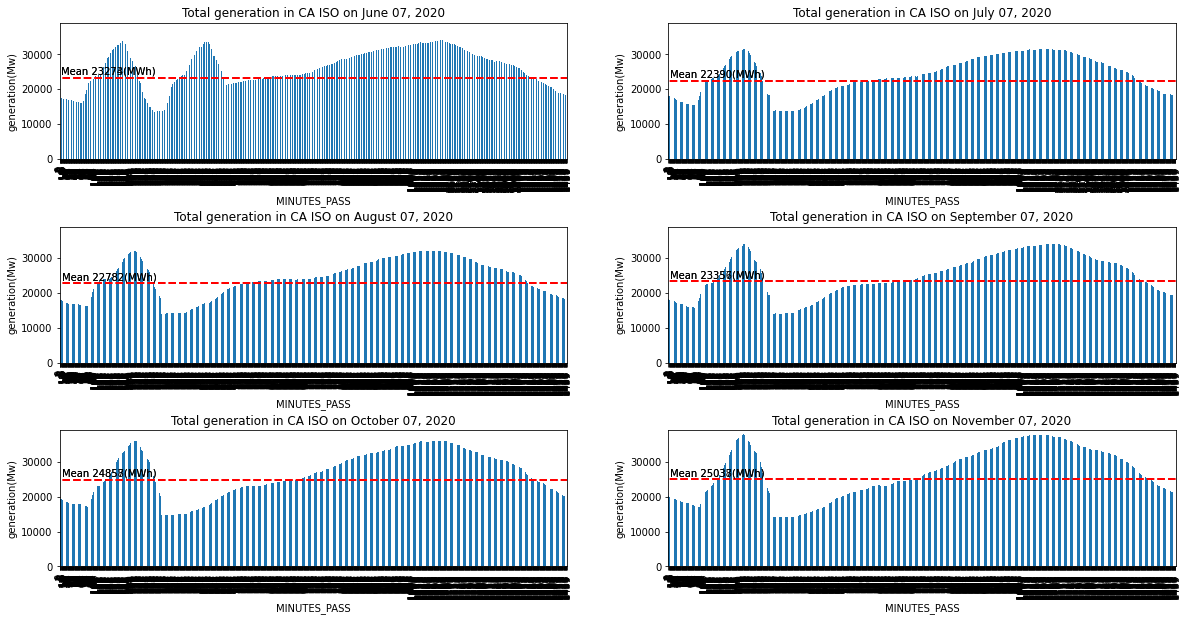

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(20, 10)
fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.5)

fig = plt.figure()

for pp,ax in zip(dates,axs.flatten()):

  for frame in [ df,df2]:
    
      sub_df = frame[frame['DATE']==pp]
      sub_df.plot.bar(x='MINUTES_PASS', y=["total_generation"],ax = ax, title = "Total generation in "+ Region + " on "+ pp.strftime('%B %d, %Y'))
    
      ax.set_ylabel("generation(Mw)")
  
      mean_gen = round(sub_df["total_generation"].mean())
      max_gen = sub_df["total_generation"].max()
      maxh = sub_df.loc[sub_df["total_generation"]== max_gen]
      maxh = maxh["MINUTES_PASS"]
      ax.axhline(y=mean_gen, xmin=-1, xmax=1, color='r', linestyle='--', lw=2)
      ax.text(5,mean_gen+1000, "Mean " + str(mean_gen) + "(MWh)" )
      ax.get_legend().remove()
      ax.set_ylim(bottom = 0,top=39000)

  # plt.xlim(0,18000)
  # plt.ylim(0,30)
  # plt.show()

In [ ]:
# chats of all days in series 

# for pp in df_nw['DATE'].unique():
# #     print(df_nw[pp])
#     print(pp)
#     sub_df=df_nw[df_nw['DATE']==pp]
#     ax = sub_df.plot(x='HOURS', y=["total_generation"], title = "Total generation in "+ Region + " on "+ pp.strftime('%B %d, %Y'))
#     ax.axhline(y=sub_df["total_generation"].mean(), xmin=-1, xmax=1, color='r', linestyle='--', lw=2)

2020-06-07
2020-07-07
2020-08-07
2020-09-07
2020-10-07
2020-11-07


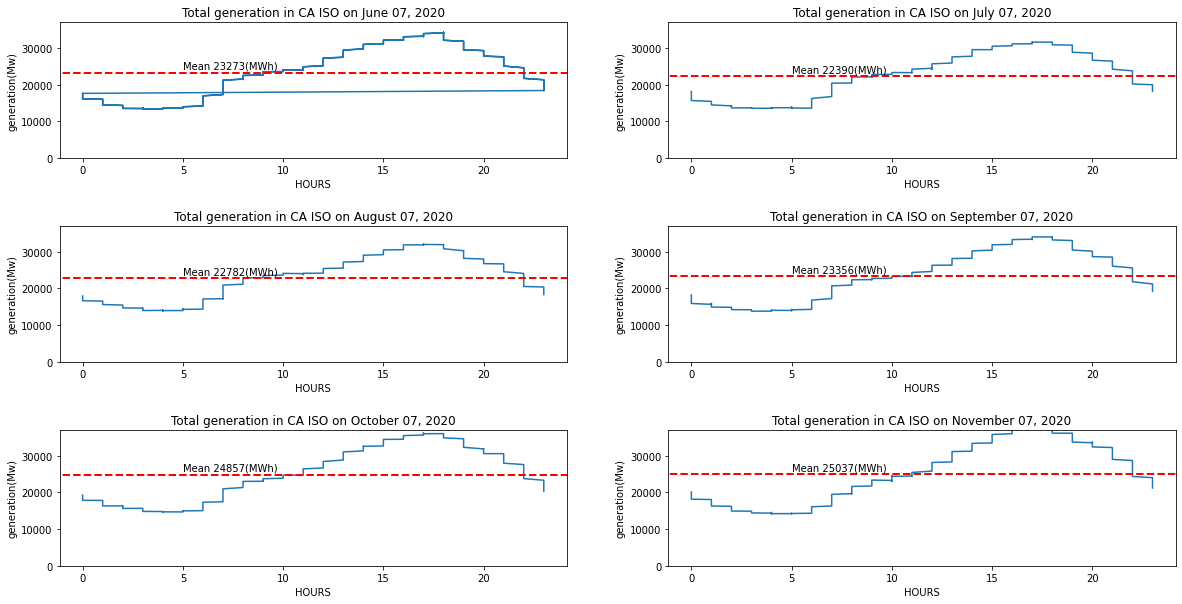

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(20, 10)
fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.5)

for pp,ax in zip(dates,axs.flatten()):
#     print(df_nw[pp])
    print(pp)
    sub_df=df[df['DATE']==pp]
    sub_df.plot(x='HOURS', y=["total_generation"],ax = ax, title = "Total generation in "+ Region + " on "+ pp.strftime('%B %d, %Y'))
    
    ax.set_ylabel("generation(Mw)")
    
    mean_gen = round(sub_df["total_generation"].mean())
    max_gen = sub_df["total_generation"].max()
    maxh = sub_df.loc[sub_df["total_generation"]== max_gen]
    maxh = maxh["HOURS"]
    ax.axhline(y=mean_gen, xmin=-1, xmax=1, color='r', linestyle='--', lw=2)
    
    ax.text(5,mean_gen+1000, "Mean " + str(mean_gen) + "(MWh)" )
    
    ax.get_legend().remove()
    
#     ax.annotate('Peak '+ str(max_gen)+ "(MWh)", xy=(maxh,max_gen), xytext=(maxh+1, max_gen+1000),
#              arrowprops=dict(arrowstyle='-|>') ,ha='left', rotation=0)
    
    ax.set_ylim(bottom = 0,top=37000)

# ax.axhline(y=df_nw["total_generation"].median(), xmin=-1, xmax=1, color='g', linestyle='--', lw=2)

## Daily chart for the week 

2020-06-07
2020-07-07
2020-08-07
2020-09-07
2020-10-07
2020-11-07


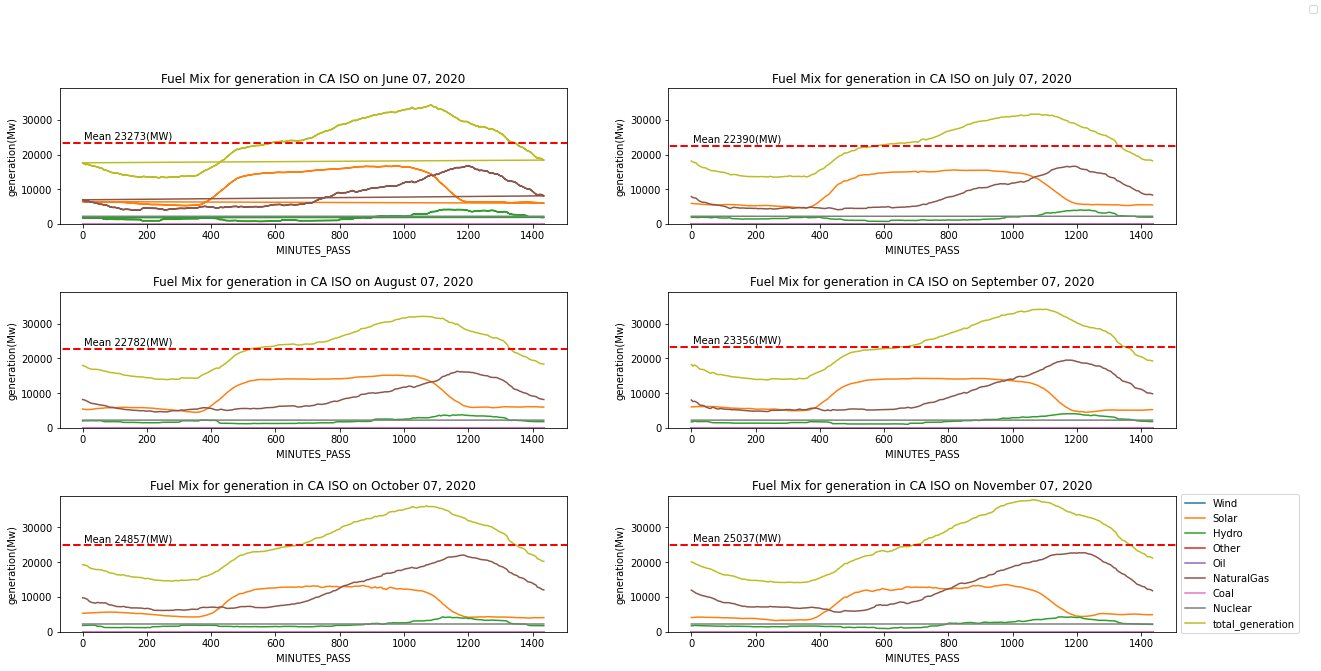

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(20, 10)
fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.5)

fig.legend(column_list)

    
for pp,ax in zip(dates,axs.flatten()):
#     print(df_nw[pp])
    print(pp)
    sub_df = df[df['DATE']==pp]
    sub_df.plot.line(x='MINUTES_PASS', y = column_list[0], ax = ax, title = "Fuel Mix for generation in "+ Region + " on "+ pp.strftime('%B %d, %Y'),legend=False)
    sub_df.plot.line(x='MINUTES_PASS', y = column_list[1], ax = ax,legend=False)
    sub_df.plot.line(x='MINUTES_PASS', y = column_list[2], ax = ax,legend=False)    
    sub_df.plot.line(x='MINUTES_PASS', y = column_list[3], ax = ax,legend=False)
    sub_df.plot.line(x='MINUTES_PASS', y = column_list[4], ax = ax,legend=False)
    sub_df.plot.line(x='MINUTES_PASS', y = column_list[5], ax = ax,legend=False)
    sub_df.plot.line(x='MINUTES_PASS', y = column_list[6], ax = ax,legend=False)
    sub_df.plot.line(x='MINUTES_PASS', y = column_list[7], ax = ax,legend=False)
    sub_df.plot.line(x='MINUTES_PASS', y =['total_generation'], ax = ax,legend=False)
    
    ax.set_ylabel("generation(Mw)")
    
    mean_gen = round(sub_df["total_generation"].mean())
    max_gen = sub_df["total_generation"].max()
    maxh = sub_df.loc[sub_df["total_generation"]== max_gen]
    maxh = maxh["MINUTES_PASS"]
    ax.axhline(y=mean_gen, xmin=-1, xmax=1, color='r', linestyle='--', lw=2)
    
    ax.text(5,mean_gen+1000, "Mean " + str(mean_gen) + "(MW)" )

#     ax.get_legend().remove()
    
#     ax.annotate('Peak '+ str(max_gen)+ "(MWh)", xy=(maxh,max_gen), xytext=(maxh+1, max_gen+1000),
#              arrowprops=dict(arrowstyle='-|>') ,ha='left', rotation=0)
    
    ax.set_ylim(bottom = 0,top=39000)
    
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
# # Line Chart ( Trend during the day)
# plt = df.plot.line(x='HOURS',
#                     y = column_list,
#                     title = "Generation in "+ Region + " on "+ Date)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
# usage in one day 
# df_nw.plot(x='HOURS',  kind='hist')

# df_nw.plot(x='HOURS', y=["Wind Generation (MWh)","Solar Generation (MWh)","Hydro Generation (MWh)","Other Generation (MWh)", 
#                         "Petroleum Generation (MWh)", "Natural gas Generation (MWh)","Coal Generation (MWh)","Nuclear Generation (MWh)"], kind='hist')

## Peak Hour

In [ ]:
## Peak Min
peakmin = df[df["total_generation"] == df["total_generation"].max()]
peakmin = peakmin.reset_index(drop=True)
peakmin

,Solar,NaturalGas,Hydro,Nuclear,Coal,Other,Timestamp,DATE,TIME,HOURS,MINUTES,MINUTES_PASS,Wind,Oil,total_generation,Timestamp (Unix)
0,11872,20282,3521,2271,10,0,2020-11-07 17:45:00,2020-11-07,17:45:00,17,45,1065,0,0,37956,1604771100


In [ ]:
## Peak Hour
# df_nw= df_nw[df_nw["DATE"].astype(str) == Date]
peakhour = df[(df['HOURS'].values==peakmin.HOURS.values) & (df["DATE"].values==peakmin.DATE.values) ]
peakhour

,Solar,NaturalGas,Hydro,Nuclear,Coal,Other,Timestamp,DATE,TIME,HOURS,MINUTES,MINUTES_PASS,Wind,Oil,total_generation,Timestamp (Unix)
17:00,12935,19138,3191,2271,11,0,2020-11-07 17:00:00,2020-11-07,17:00:00,17,0,1020,0,0,37546,1604768400
17:05,12864,19385,3047,2270,11,0,2020-11-07 17:05:00,2020-11-07,17:05:00,17,5,1025,0,0,37577,1604768700
17:10,12744,19638,2976,2270,10,0,2020-11-07 17:10:00,2020-11-07,17:10:00,17,10,1030,0,0,37638,1604769000
17:15,12625,19706,3003,2270,11,0,2020-11-07 17:15:00,2020-11-07,17:15:00,17,15,1035,0,0,37615,1604769300
17:20,12503,19761,3055,2270,11,0,2020-11-07 17:20:00,2020-11-07,17:20:00,17,20,1040,0,0,37600,1604769600
17:25,12404,19826,3168,2270,11,0,2020-11-07 17:25:00,2020-11-07,17:25:00,17,25,1045,0,0,37679,1604769900
17:30,12285,19855,3259,2269,11,0,2020-11-07 17:30:00,2020-11-07,17:30:00,17,30,1050,0,0,37679,1604770200
17:35,12153,19966,3295,2270,11,0,2020-11-07 17:35:00,2020-11-07,17:35:00,17,35,1055,0,0,37695,1604770500
17:40,12016,20169,3414,2270,10,0,2020-11-07 17:40:00,2020-11-07,17:40:00,17,40,1060,0,0,37879,1604770800
17:45,11872,20282,3521,2271,10,0,2020-11-07 17:45:00,2020-11-07,17:45:00,17,45,1065,0,0,37956,1604771100


In [ ]:
## Average generation 
average = peakhour["total_generation"].mean()
average

37701.0

Text(-0.4, 37701.0, 'average')

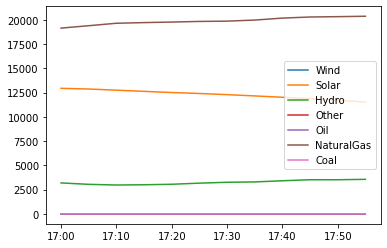

In [ ]:
peakhour.plot(y = ['Wind', 'Solar', 'Hydro', 'Other', 'Oil', 'NaturalGas', 'Coal'])
ax.hlines(23, -.5,.5, linestyles='dashed')
ax.annotate('average',(-0.4, average))

pick value in order off release fromm peakhour

In [ ]:
# peakhour =  peakhour.iloc[: , column_list].copy()  
peakt= peakmin[['Wind', 'Solar', 'Hydro', 'Other', 'Oil', 'NaturalGas', 'Coal', 'Nuclear']].transpose()

# # peakhourt=peakhour2.reindex(["Nuclear Generation (MW)", "Wind Generation (MW)", "Solar Generation (MW)","Hydro Generation (MW)" ,  
# #                          "Coal Generation (MW)", "Natural gas Generation (MW)","Petroleum Generation (MW)","Other Generation (MW)"])

for col in peakt.columns:
    peakt = peakt.rename(columns={col:'generation'})
    
peakt

,generation
Wind,0
Solar,11872
Hydro,3521
Other,0
Oil,0
NaturalGas,20282
Coal,10
Nuclear,2271


In [ ]:
# pie chart Percentage for Contribution by fuel during peak hour
peakt["percent"] = (peakt['generation'] / peakt['generation'].sum()) * 100
peakt["percent"] = peakt["percent"].round(1)

# peakt = peakt.mask(peakhour2< 0, 0)
peakt

,generation,percent
Wind,0,0.0
Solar,11872,31.3
Hydro,3521,9.3
Other,0,0.0
Oil,0,0.0
NaturalGas,20282,53.4
Coal,10,0.0
Nuclear,2271,6.0


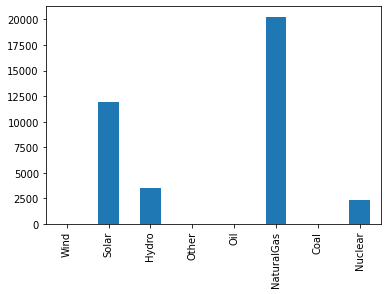

In [ ]:
peakt["generation"].plot.bar(stacked=True)

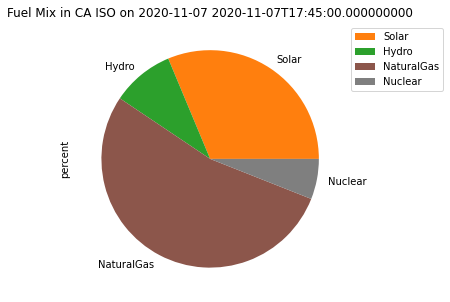

In [ ]:
pie_peakhour= peakt.plot.pie(y='percent',title="Fuel Mix in "+ Region + " on "+ str(peakmin.DATE.values[0])+" "+str(peakmin.Timestamp.values[0]) , figsize=(5, 5))
pie_peakhour.legend(bbox_to_anchor=(1,1), loc="centre right")

In [ ]:
peakt = peakt.drop(columns='percent')

In [ ]:
# Cummulative_generation
# peakt['Cummulative_generation']  = peakt["generation"].cumsum()
# peakt

In [ ]:
# peakt.plot(x="Cummulative_generation")

In [ ]:
# draw graph for cummultaive consumption 
# peakhour2.plot("Cummulative_consumption")

# peakhour2.plot.bar(peakhour2["Cummulative_consumption"], drawstyle='steps')
# peakhour2.reset_index().plot.line(peakhour2["Cummulative_consumption"], peakhour2.index, drawstyle='steps')

<a id="section-five"></a>
# 5. Carbon Emission vs Fuel

Now merge dataset and look at data distributions and correlations for Co2 and fuel sources 

In [ ]:
df_carbon = pd.read_csv("/content/lcoe-co2/US Utility grids - LCOE Co2 Emissions - Carbon2.csv")
df_carbon

FileNotFoundError: ignored

In [ ]:
df_carbon.info()
df_carbon['Life cycle CO2 equivalent  ( kgCO2eq/MWh)']

In [ ]:
df_carbon.sort_values('Life cycle CO2 equivalent  ( kgCO2eq/MWh)',ascending=True).plot( x='Fuel Type',kind='bar')

### Time vs consumption

In [ ]:
# for i, row in peakhour2.iterrows():
#     print(i)
            
# for j,lcoe in df_lcoe.iterrows():
#         print(lcoe.values[0])

peakt['carbon']=0
for i, row in peakt.iterrows():
    for j,carbon in df_carbon.iterrows():
        if i in carbon[0]:
            print("Match between two tables for "+i+ " and "+ carbon[0])
            generation=row[0]
            print(str(generation) + ' * '+ str(carbon[1]))
            peakt.at[i,'carbon'] = generation * carbon[1]
            
peakt

In [ ]:
# sort by ascending order of carbon emission
peakt = peakt.sort_values(by=['carbon'])
peakt

In [ ]:
# peakt["total_carbon(metric tons)"] = (peakt["generation"] * peakt["carbon"]) / 1000
# peakt

In [ ]:
# Cummulative_generation with respect to nw ordering of carbon 
peakt['Cummulative_generation']  = peakt["generation"].cumsum()
peakt

In [ ]:
# Cummulative_carbon emission 
peakt['Cummulative_carbon(kg)']  = peakt["carbon"].cumsum()
peakt

In [ ]:
def def_plot_limity(ymax,ypos):
    if (ypos < ymax ):
        return ypos
    return (ymax - (0.2*ymax))

def def_plot_limitx(xmax,xpos):
    if (xpos < xmax ):
        return xpos
    return xmax

In [ ]:
## standard plot consumption vs total carbon 
# carbonplot = peakt.plot(x="generation",y="carbon",grid=True, style='.-', 
#                             title='carbon vs consumption in '+ Region + " on " + str(peakmin.DATE.values) ,legend=True)
# carbonplot.set_xlabel("generation(MW)")
# carbonplot.set_ylabel("carbon(kg)")

# index=0
# colcount=len(peakt.columns)
# for i, row in peakt.iterrows():
#     index=index+1
#     generation = row.values[0]
#     carbon = row.values[1]
#     print(generation, carbon)
#     carbonplot.annotate(i, xy=(generation, carbon), 
#                         xytext=(generation+(colcount-index)*1000, carbon+(colcount-index)*220000),
#                         arrowprops=dict(arrowstyle='-|>') ,ha='left', rotation=45)

In [ ]:
## Cumulative plot 
carbonplot = peakt.plot(x="Cummulative_generation",y="Cummulative_carbon(kg)", 
                            title='Cummulative_carbon vs Cummulative_generation in \n'
                        + Region + " on " + str(peakmin.DATE.values[0])+ " " +str(peakmin.Timestamp.values[0]) ,
                        grid=True, style='.-',legend=True)
carbonplot.set_xlabel("Cumulative generation (MW) ")
carbonplot.set_ylabel("Cummulative_carbon(kg)")

xmax = peakt['Cummulative_generation'].max()
ymax = peakt['Cummulative_carbon(kg)'].max()
index=0
colcount=len(peakt.columns)

for i, row in peakt.iterrows():
    index = index+1
    x = row.values[2]
    y = row.values[3]
    xpos = def_plot_limitx(xmax, x+index*1000)
    ypos = def_plot_limity(ymax, y+index*460000)
    carbonplot.annotate(i, xy=(x, y), 
                         xytext=(xpos, ypos), ha='center', va='center',
                         arrowprops=dict(arrowstyle='-|>') , rotation=0)
    
#     carbonplot.annotate(i, xy=(row.values[3], row.values[5]), ha='left', rotation=60)
# xytext=(row.values[3]+(index+1000)*randint(1,5), row.values[3]+(index+1000)*randint(1,5))

In [ ]:

# cplot = peakhour3.plot(y="commulative_CO2 emissions",x="commulative_demand",grid=True, style='.-', 
#                             title='commulative_CO2 emissions vs commulative_demand',legend=True)
# cplot.set_xlabel("commulative_demand (kW) ")
# cplot.set_ylabel("commulative_CO2 emissions (kg/kWh)")

# index=0
# colcount=len(df.columns)
# for i, row in peakhour3.iterrows():
#     index=index+1
#     print(row.values[3])
#     tag= row.values[0], row.values[3], row.values[5]
#     cplot.annotate(tag, 
#                     xy=(row.values[3], row.values[5]), 
#                     xytext=(row.values[3]+(colcount-index), row.values[5]+(colcount-index)),
#                     arrowprops=dict(arrowstyle='-|>') ,ha='left', rotation=0)

<a id="section-four"></a>
# 4.Cost vs Fuel Type
LCOE (Levelized Cost Of generating Electricity) - price per MWh
Now that we have a merged dataset we can take a closer look at data distributions and correlations.

In [ ]:
df_cost = pd.read_csv("/content/lcoe-co2/US Utility grids - LCOE Co2 Emissions - Price2.csv")
df_cost
## Data source : IPCC ANEX III Technology-specific Cost and Performance Parameters -2014
# Schlömer S., T. Bruckner, L. Fulton, E. Hertwich, A. McKinnon, D. Perczyk, J. Roy, R. Schaeffer, R. Sims, P. Smith, and R. Wiser,
# 2014: Annex III: Technology-specific cost and performance parameters. In: Climate Change 2014: Mitigation of Climate
# Change. Contribution of Working Group III to the Fifth Assessment Report of the Intergovernmental Panel on Climate
# Change [Edenhofer, O., R. Pichs-Madruga, Y. Sokona, E. Farahani, S. Kadner, K. Seyboth, A. Adler, I. Baum, S. Brunner, P.
# Eickemeier, B. Kriemann, J. Savolainen, S. Schlömer, C. von Stechow, T. Zwickel and J.C. Minx (eds.)]. Cambridge University
# Press, Cambridge, United Kingdom and New York, NY, USA.

In [ ]:
# df_cost['LCOE / Marginal Cost ( with subsidy)  ( $/Mwh)']
df_cost[['Fuel Type','LCOE from IEA 2020 ($/MWh) ']]

# df_cost.info()
## Data source : https://www.iea.org/articles/levelised-cost-of-electricity-calculator LCOE estimates from Projected Costs of Generating Electricity 2020

In [ ]:
df_cost.sort_values('LCOE from IEA 2020 ($/MWh) ',ascending=True).plot(x="Fuel Type",y='LCOE from IEA 2020 ($/MWh) ', kind='bar')
# df_cost.xticks(rotation=90)

IEA LCOE estimates from Projected Costs of Generating Electricity 2020

In [ ]:
# Assumptions 
# Discount rate 7% Central case
# Carbon price 30.00 USD/ton Default assumption
# Heat price 37.06 USD/MWh Default assumption
# Coal price 100% Default assumption
# Gas price 100% Default assumption

In [ ]:
peakt = peakt.drop(columns=['Cummulative_generation','carbon','Cummulative_carbon(kg)'])

In [ ]:
peakt['price']=0
for i, row in peakt.iterrows():
#     print(i)
    for j,cost in df_cost.iterrows():
#         print(lcoe.values[0])
        if i in cost[0]:
            print("Match between two tables for "+i+ " and "+ cost[0])
            print(cost.values[2])
            print(row.values[0])
            peakt.at[i,'price']= cost[2] * row[0]

peakt

In [ ]:
# sort by ascending order of price
peakt = peakt.sort_values(by=['price'])
peakt

In [ ]:
# Cummulative_generation with respect to nw ordering of cost 
peakt['Cummulative_generation']  = peakt["generation"].cumsum()
peakt

In [ ]:
# peakt["total_price($thousand)"] = (peakt["generation"] * peakt["price"]) / 1000
# peakt

In [ ]:
# Cummulative price
peakt['Cummulative_price($)']  = peakt["price"].cumsum()
peakt

In [ ]:
# Plot price vs generation

# costplot = peakt.plot(y="price",x="generation",grid=True, style='.-', 
#                             title='price vs generation in ' + Region ,legend=True)
# costplot.set_xlabel("generation (MW) ")
# costplot.set_ylabel("Price LCOE ($/MWh)")

# index =0
# colcount=len(peakt.columns)
# for i, row in peakt.iterrows():
#     index=index+1
# #     print(row.values[6])
# #     costplot.text(row.values[2]+index*10, row.values[6]+index*30, str(i))
#     costplot.annotate(i, xy=(row.values[0], row.values[1]), 
#                         xytext=(row.values[0]+(colcount-index)*1000, row.values[1]+(colcount-index)*3000),
#                         arrowprops=dict(arrowstyle='-|>') ,ha='left', rotation=0)

In [ ]:
# Plot Cummulative_price vs Cummulative_generation

costplot = peakt.plot(x="Cummulative_generation",y='Cummulative_price($)', 
                            title='Cummulative_price vs Cummulative_generation in \n'
                       + Region + " on " + str(peakmin.DATE.values[0])+ " " +str(peakmin.Timestamp.values[0]) ,
                      grid=True, style='.-',legend=True)
costplot.set_xlabel("Cumulative generation(MW)")
costplot.set_ylabel("Cummulative_price($)")

xmax = peakt['Cummulative_generation'].max()
ymax = peakt['Cummulative_price($)'].max()
index =0
colcount=len(peakt.columns)
for i, row in peakt.iterrows():
    index=index+1
    x = row.values[2]
    y = row.values[3]
    xpos = def_plot_limitx(xmax, x+index*1000)
    ypos = def_plot_limity(ymax, y+index*5500)
    costplot.annotate(i, xy=(x,y), 
                        xytext=(xpos, ypos),
                        arrowprops=dict(arrowstyle='-|>') ,ha='left', rotation=0)